In [1]:


import json
import math
import keras_cv
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import losses
import numpy as np
from keras import metrics
import matplotlib.pyplot as plt


Using TensorFlow backend


In [2]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/animal-picture-set-penguin-turtle/animals_medium_penguin_turtle/animals_medium_penguin_turtle',
    image_size=(224,224),
    validation_split=0.3,
    subset='both',
    seed=123
)

Found 402 files belonging to 2 classes.
Using 282 files for training.
Using 120 files for validation.


In [3]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
train_ds = train_ds.shuffle(
    10 * 32, reshuffle_each_iteration=True
)

(32, 224, 224, 3)


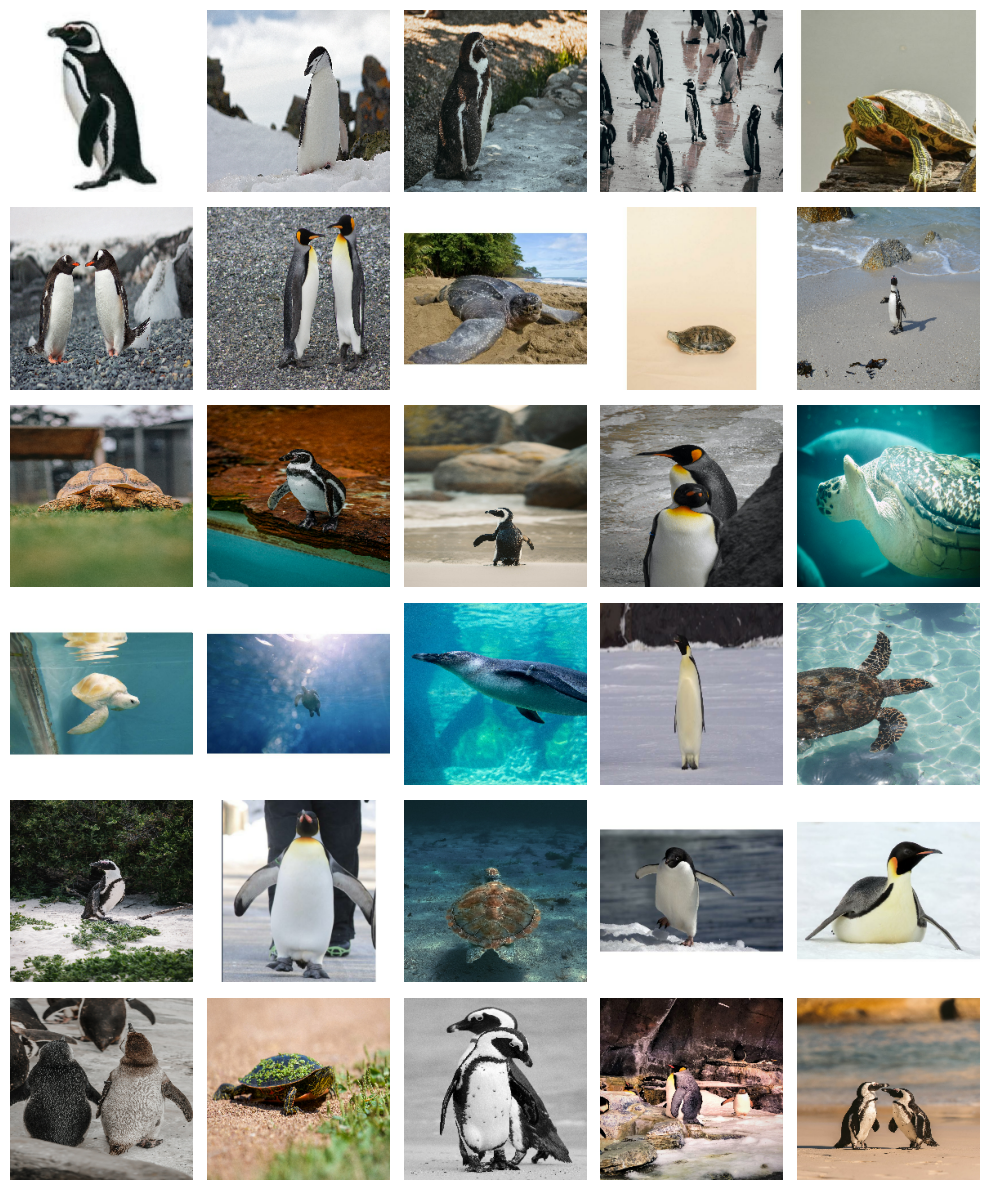

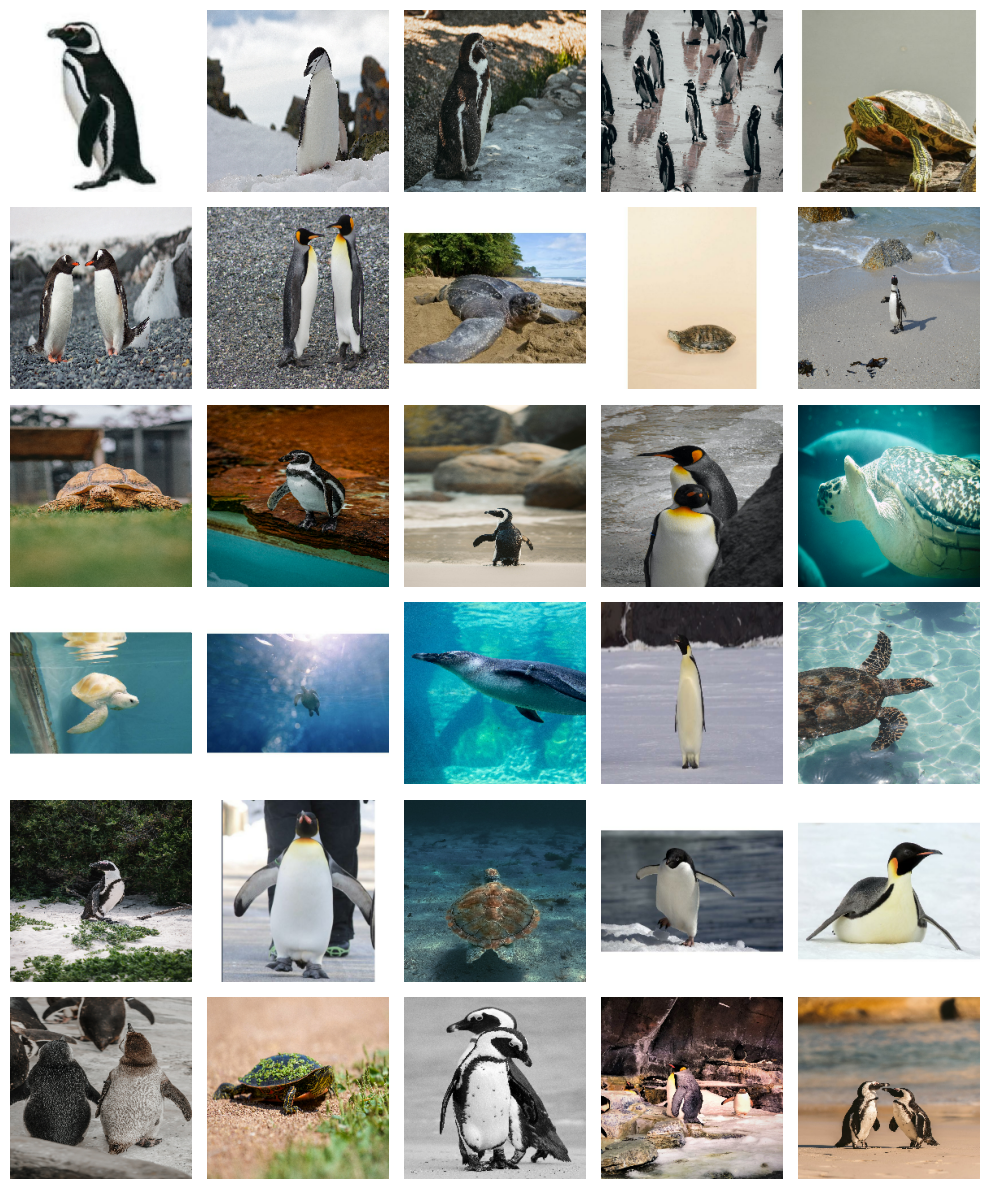

In [5]:
images = next(iter(train_ds.take(1)))[0]
print(images.shape)
keras_cv.visualization.plot_image_gallery(images, value_range=(0,255))

In [6]:
model = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b0_imagenet", num_classes=2
)

24029184/24029184 [==============================] - 1s 0us/step


In [7]:
model.compile(
    loss="sparse_categorical_crossentropy",
    # optimizer=tf.optimizers.SGD(learning_rate=0.01),
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=["accuracy"],
)

In [8]:
r = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs = 10,
)


Epoch 1/10
9/9 [==============================] - 107s 6s/step - loss: 0.2923 - accuracy: 0.8972 - val_loss: 0.1048 - val_accuracy: 0.9667
Epoch 2/10
9/9 [==============================] - 69s 5s/step - loss: 0.0310 - accuracy: 0.9929 - val_loss: 0.0813 - val_accuracy: 0.9750
Epoch 3/10
9/9 [==============================] - 76s 6s/step - loss: 0.0411 - accuracy: 0.9823 - val_loss: 0.1405 - val_accuracy: 0.9500
Epoch 4/10
9/9 [==============================] - 69s 5s/step - loss: 0.0288 - accuracy: 0.9929 - val_loss: 0.2093 - val_accuracy: 0.9583
Epoch 5/10
9/9 [==============================] - 74s 6s/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.1905 - val_accuracy: 0.9583
Epoch 6/10
9/9 [==============================] - 67s 5s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9417
Epoch 7/10
9/9 [==============================] - 75s 6s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.2858 - val_accuracy: 0.9417
Epoch 8/10
9/9 [=================

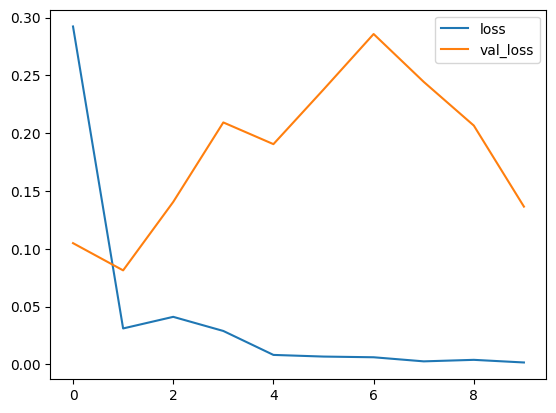

In [9]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

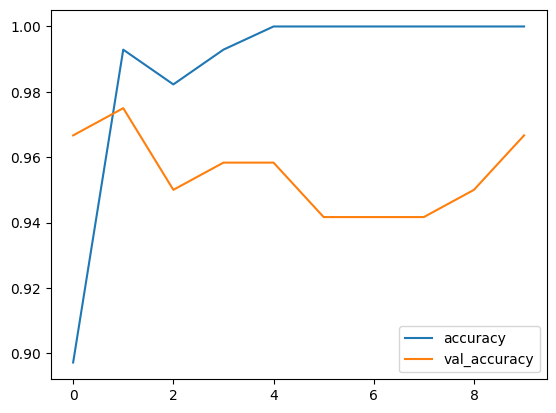

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

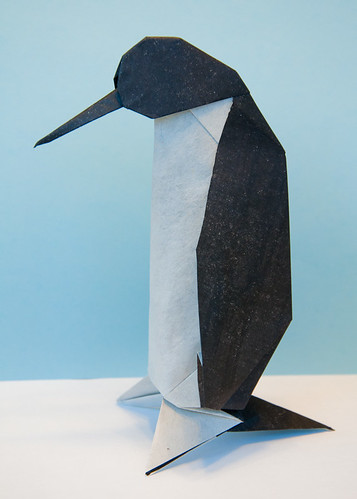

In [11]:
# Make a prediction on a single image
from PIL import Image
import requests
from io import BytesIO

# url = 'https://i.pinimg.com/originals/fe/15/ba/fe15baa22867b65d8d140ff13d80dbb9.jpg'
url = 'https://th.bing.com/th/id/R.23a05e4003d9965a0d8b4545968d8d0e?rik=GZkN7i%2fV4zQDsw&riu=http%3a%2f%2ffarm6.static.flickr.com%2f5019%2f5519541373_d01605485a.jpg&ehk=CTmiW56kKocIM0LcJIcsJ6mzp1w6Bry5JCOs20mhLNk%3d&risl=&pid=ImgRaw&r=0'
response = requests.get(url)
im = Image.open(BytesIO(response.content))
# path = '/kaggle/input/animal-picture-set-penguin-turtle/animals_medium_penguin_turtle/animals_medium_penguin_turtle/penguins/103_penguin.png'
# path = '/kaggle/input/animal-picture-set-penguin-turtle/animals_medium_penguin_turtle/animals_medium_penguin_turtle/turtles/114_turtle.png'
# im = Image.open(path)
im

In [12]:
np_im = np.asarray(im)

In [13]:
resizing = keras_cv.layers.Resizing(
    224, 224, crop_to_aspect_ratio=True
)

In [14]:
np_im_rs = resizing(np_im)

In [15]:
x = tf.reshape(np_im_rs, (1, 224, 224, 3))

In [16]:
out = model.predict(x)

1/1 [==============================] - 2s 2s/step


In [17]:
out[0][1]

0.0001640005

In [18]:
val_ds.class_names

['penguins', 'turtles']

In [19]:
if (out[0][0] > out[0][1]):
    print(f"Image class prediction is {val_ds.class_names[0]} with {round(out[0][0] * 100, 4)}% of confidence")
else:
    print(f"Image class prediction is {val_ds.class_names[1]} with {round(out[0][1] * 100, 4)}% of confidence")

Image class prediction is penguins with 99.9836% of confidence
